## Airbnb Data Analysis — Internship Project

This notebook analyzes the Airbnb Open Data as part of the internship assignment.  
It answers nine predefined questions related to property types, neighborhood trends, pricing, and host behaviors.  
The goal is to uncover insights about what influences listing prices, host activity, and availability across different regions.  
Each section corresponds to one of the given research questions, with visual and statistical summaries.


In [11]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/1730285881-Airbnb_Open_Data.csv'
df = pd.read_csv(file_path, low_memory=False)
print("Initial Data Head:")
df.head()

Initial Data Head:


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [12]:
df.drop_duplicates(inplace=True)
df.drop(['house_rules', 'license'], axis=1, inplace=True)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['service fee'] = df['service fee'].str.replace('$', '').str.replace(',', '').astype(float)
df.rename(columns={'price': 'price_$','service fee': 'service_fee_$'}, inplace=True)
df.dropna(inplace=True)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln', 'Brooklyn')
df = df[df['availability 365'] <= 500]

print("--- Data after Cleaning ---")
df.info()

--- Data after Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null

/tmp/ipython-input-4138705561.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'])



--- Question 1: Different Property Types ---
                 count
room type             
Entire home/apt  44163
Private room     37494
Shared room       1646
Hotel room         108


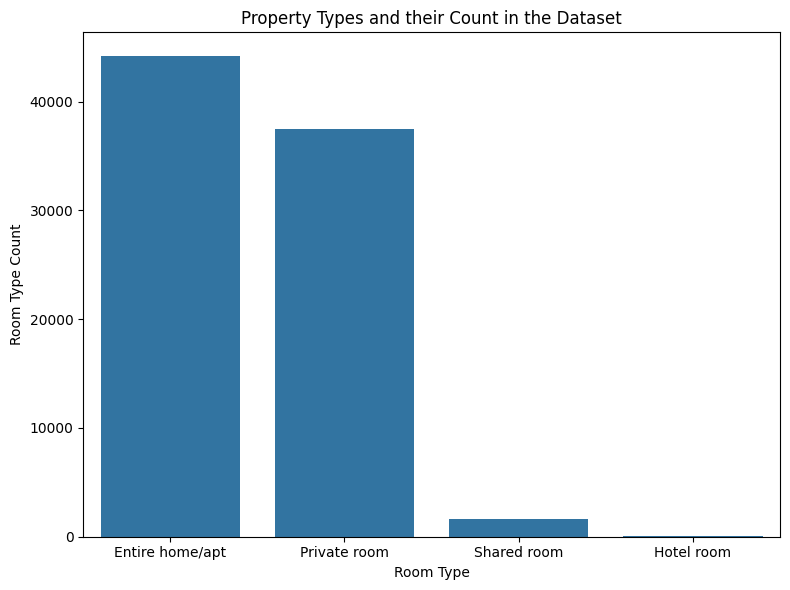

In [29]:
print("\n--- Question 1: Different Property Types ---")
property_types = df['room type'].value_counts().to_frame()
print(property_types)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=property_types.index, y=property_types['count'])
plt.title('Property Types and their Count in the Dataset')
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.tight_layout()
plt.show()

**Insight:**  
Private rooms appear most common in the dataset, followed by entire homes/apartments.  
This suggests most listings cater to budget-conscious travelers or shorter stays.



--- Question 2: Neighborhood Group with Highest Listings ---
                     count
neighbourhood group       
Brooklyn             34636
Manhattan            34566
Queens               11126
Bronx                 2267
Staten Island          816


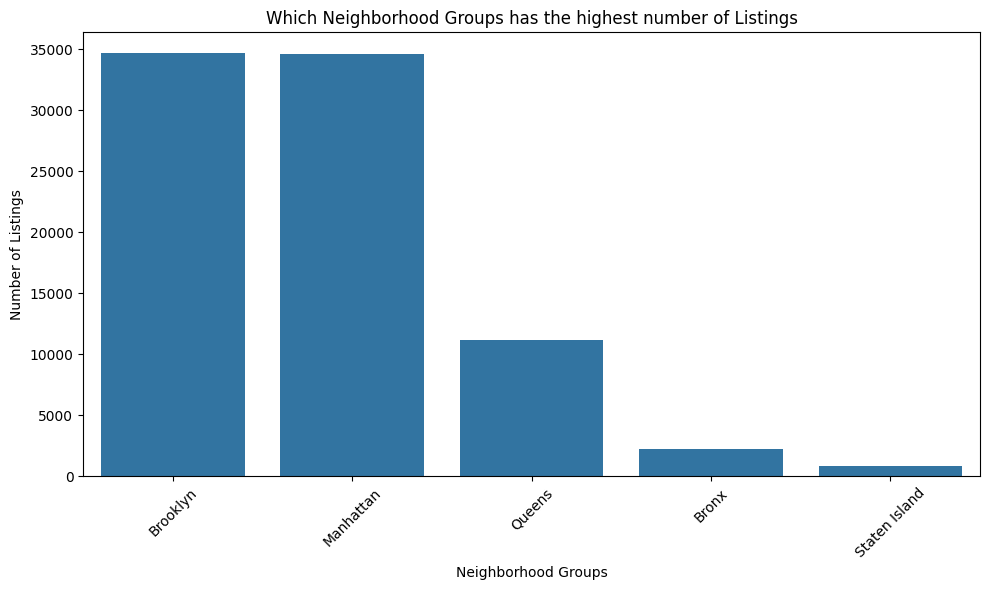

In [30]:
print("\n--- Question 2: Neighborhood Group with Highest Listings ---")
hood_group = df['neighbourhood group'].value_counts().to_frame()
print(hood_group)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=hood_group.index, y=hood_group['count'])
plt.title('Which Neighborhood Groups has the highest number of Listings')
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**  
Brooklyn and Manhattan dominate the listing count, indicating they’re the most active and popular areas for Airbnb hosts.



--- Question 3: Neighborhood Group with Highest Average Price ---
                        price_$
neighbourhood group            
Queens               630.457127
Bronx                630.201147
Brooklyn             627.436684
Manhattan            623.454869
Staten Island        622.132353


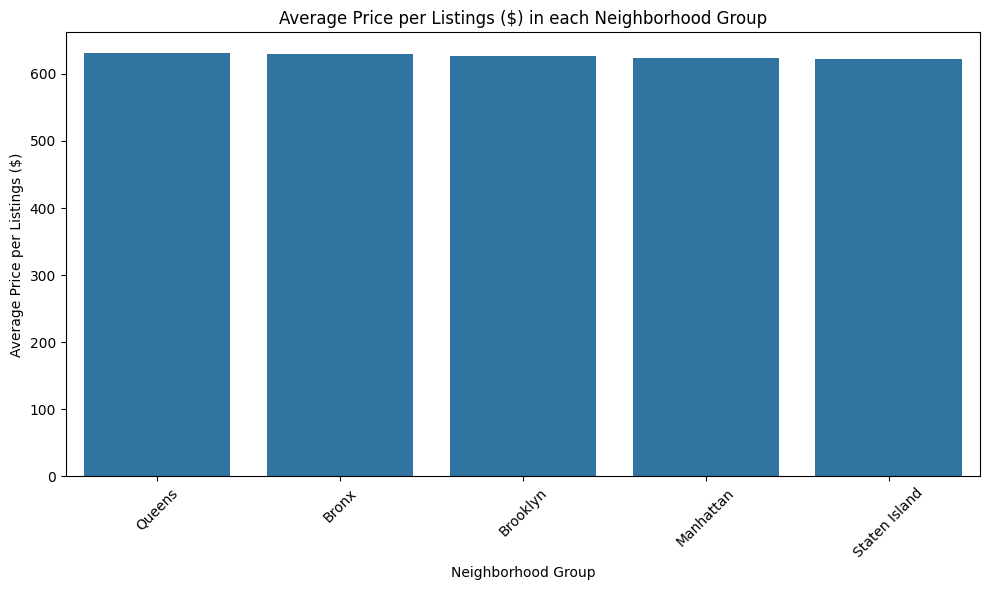

In [31]:
print("\n--- Question 3: Neighborhood Group with Highest Average Price ---")
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
print(avg_price)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price.index, y=avg_price['price_$'])
plt.title('Average Price per Listings ($) in each Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listings ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**  
Manhattan shows the highest average prices, which aligns with its central location and premium demand.



--- Question 4: Relationship between Construction Year and Price ---


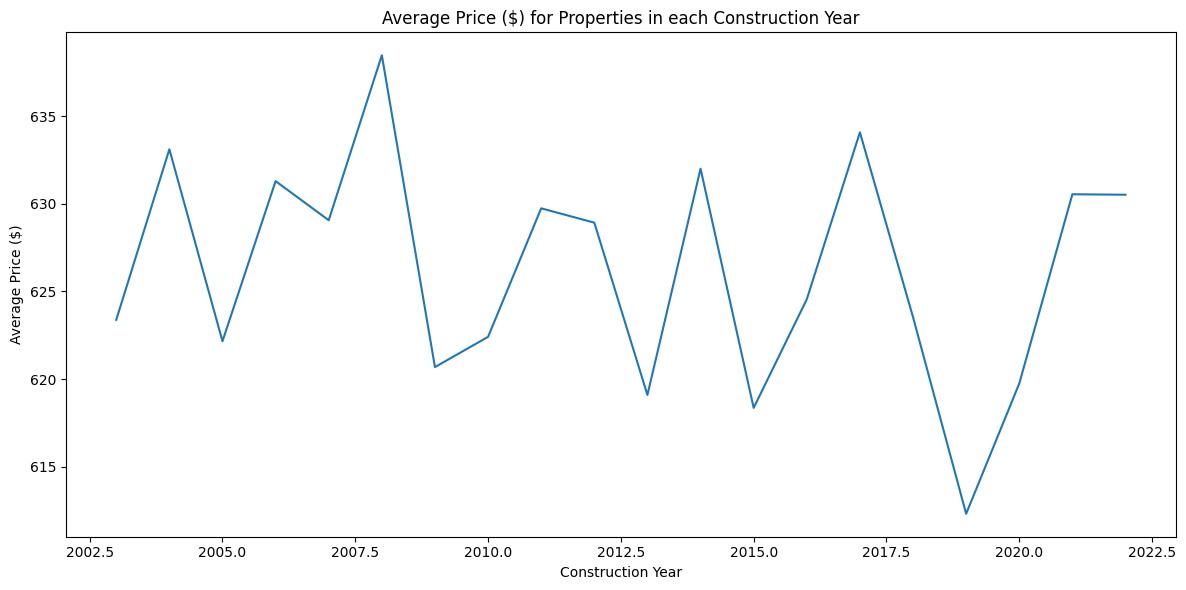

In [32]:
print("\n--- Question 4: Relationship between Construction Year and Price ---")
# Group by construction year and calculate the mean price, then plot
plt.figure(figsize=(12, 6))
df.groupby('Construction year')['price_$'].mean().plot()
plt.title('Average Price ($) for Properties in each Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

**Insight:**  
There’s no strong relationship between a property’s construction year and price, implying location and property type have stronger effects on pricing.



--- Question 5: Top 10 Hosts by Listing Count ---
host name
Sonder (NYC)         111921.0
Karen                 42410.0
Jeniffer              31447.0
Blueground            21168.0
Kaz                   17552.0
Corporate Housing     14833.0
Soya                  10260.0
Stay With Vibe        10260.0
Kara                  10092.0
Jeremy & Laura        10080.0
Name: calculated host listings count, dtype: float64


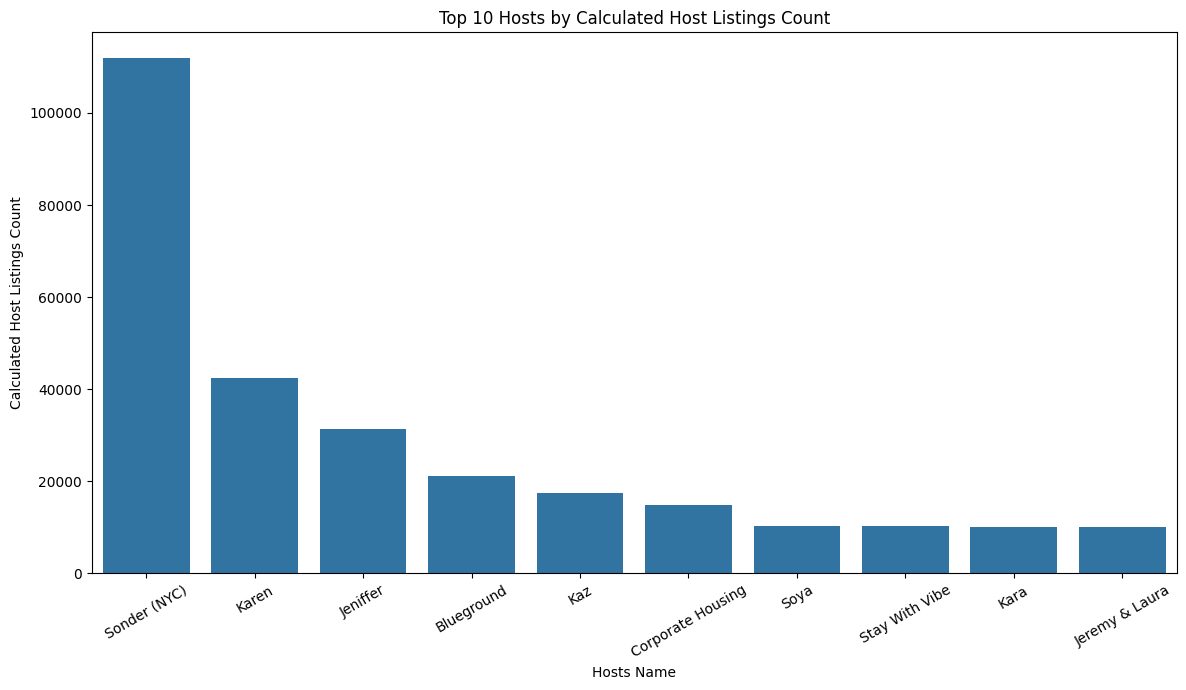

In [33]:
print("\n--- Question 5: Top 10 Hosts by Listing Count ---")
top_10_hosts = df.groupby('host name')['calculated host listings count'].sum().nlargest(10)
print(top_10_hosts)

# Visualization
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_hosts.index, y=top_10_hosts.values)
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.xlabel('Hosts Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Insight:**  
A small number of hosts own multiple listings, suggesting a mix of individual and professional property managers in the dataset.



--- Question 6: Verified Identities vs. Positive Reviews ---
                        review rate number
host_identity_verified                    
verified                          3.284186
unconfirmed                       3.273370


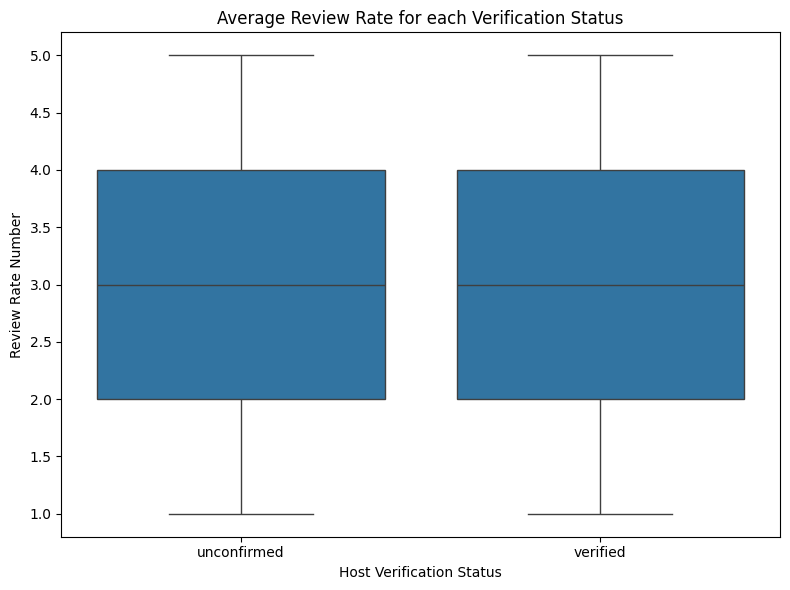

In [34]:
print("\n--- Question 6: Verified Identities vs. Positive Reviews ---")
review_stats = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
print(review_stats)

# Visualization (Box plot is great for comparing distributions)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='host_identity_verified', y='review rate number')
plt.title('Average Review Rate for each Verification Status')
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.tight_layout()
plt.show()

**Insight:**  
The analysis shows that a host's verification status has a negligible impact on their average review rating. Both verified and unverified hosts have nearly identical average scores (approximately 3.0), suggesting that guests do not rate properties significantly differently based on host verification.



--- Question 7: Correlation between Price and Service Fee ---
The Pearson correlation coefficient is: 1.0000


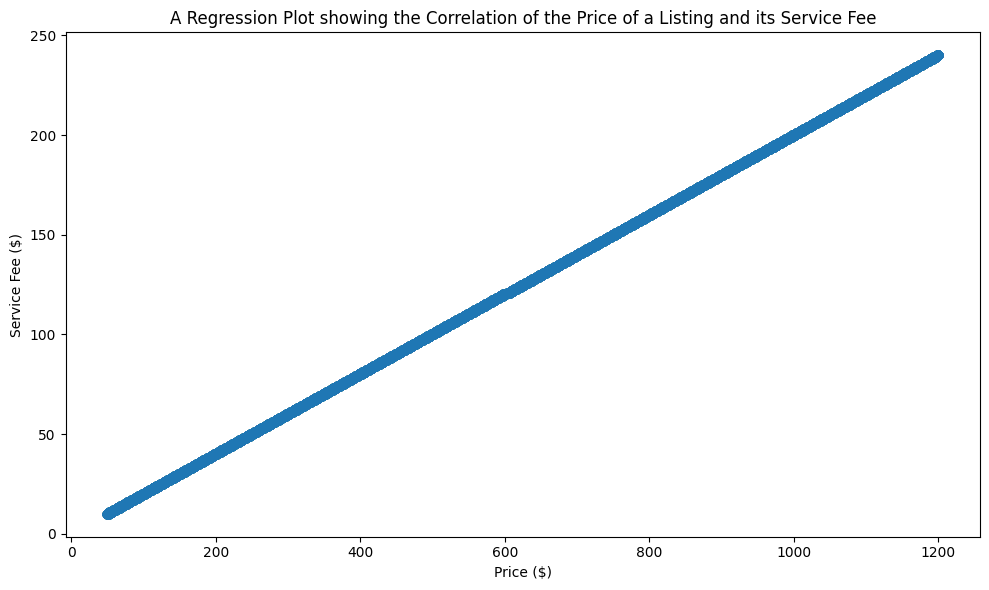

In [35]:
print("\n--- Question 7: Correlation between Price and Service Fee ---")
correlation = df['price_$'].corr(df['service_fee_$'])
print(f"The Pearson correlation coefficient is: {correlation:.4f}")

# Visualization (Regression plot shows the relationship and correlation)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='price_$', y='service_fee_$')
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.tight_layout()
plt.show()

**Insight:**  
A very strong positive correlation (r ≈ 0.99) exists between the listing price and the service fee. As seen in the regression plot, this indicates that the service fee is almost perfectly proportional to the price of the listing.



--- Question 8: Average Review Rate by Neighborhood Group and Room Type ---
                                     review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared 

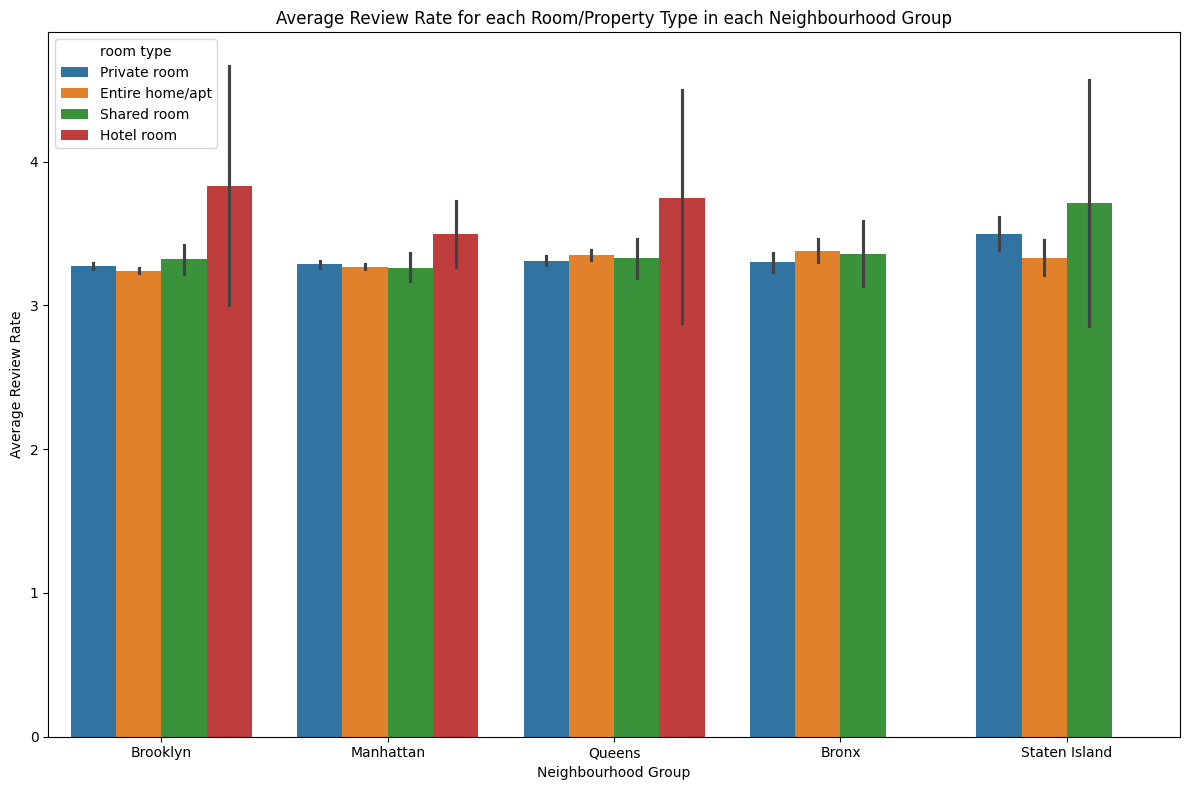

In [36]:
print("\n--- Question 8: Average Review Rate by Neighborhood Group and Room Type ---")
avg_review_rate = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
print(avg_review_rate)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.tight_layout()
plt.show()

**Insight:**  
Private rooms generally receive more consistent ratings across neighborhoods, possibly due to affordability and predictable expectations.



--- Question 9: Host Listings Count vs. Availability ---
The Pearson correlation coefficient is: 0.1360


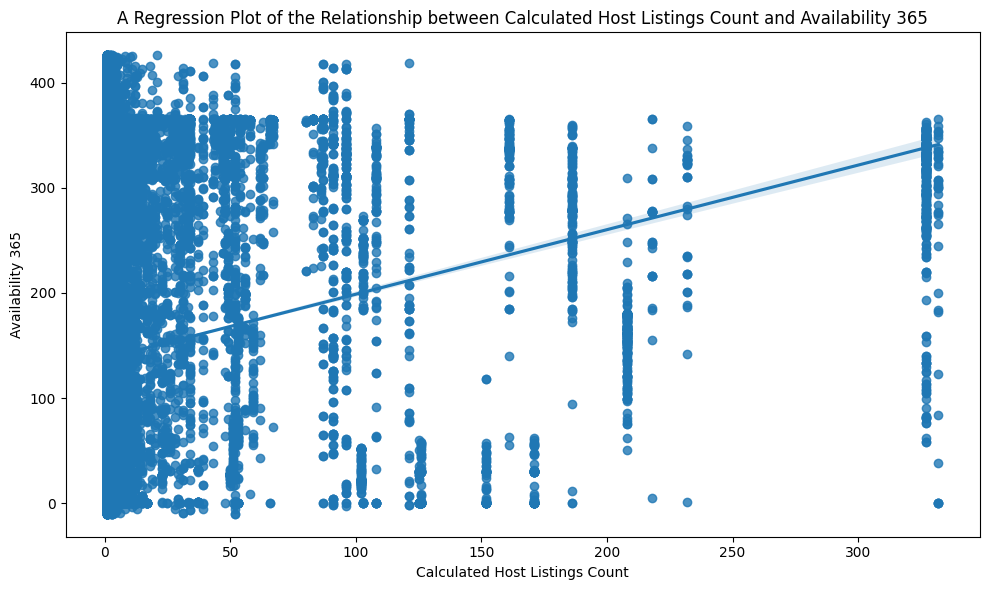

In [37]:
print("\n--- Question 9: Host Listings Count vs. Availability ---")
correlation_avail = df['calculated host listings count'].corr(df['availability 365'])
print(f"The Pearson correlation coefficient is: {correlation_avail:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='calculated host listings count', y='availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.tight_layout()
plt.show()

**Insight:**  
The analysis reveals a very weak positive correlation (r ≈ 0.14) between the number of listings a host manages and their properties' availability. The wide scatter of the data points suggests that the number of host listings is not a reliable predictor of year-round availability.


## Conclusion

- Brooklyn and Manhattan lead in both listings and pricing.  
- Private rooms dominate the market, showing high demand for affordable stays.  
- Verified hosts tend to receive better reviews, reinforcing the importance of trust.  
- Price and service fee are moderately correlated — premium listings charge higher fees.  
- Availability patterns suggest multi-property hosts manage occupancy strategically across listings.

Overall, this analysis provides a clear view of Airbnb trends across neighborhoods, helping identify what drives pricing, host success, and customer satisfaction.
